# 7.1 pandas

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
player = "Roger Federer"
file_name = "data/tennis/{name}.csv".format(name=player.replace(" ", "-"))
df = pd.read_csv(file_name)
df.tail()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
1174,2012,"Australian Open, Australia",16.01.2012,GS,Outdoor: Hard,Draw: 128,720,3,"A$437,000",S,...,49,6,16,21,95,141,51,135,146,276
1175,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3,"$50,030",R32,...,6,0,0,8,22,45,9,41,31,86
1176,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3,"$50,030",R16,...,17,0,2,9,28,50,11,49,39,99
1177,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3,"$50,030",Q,...,29,4,9,16,47,78,34,95,81,173
1178,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3,"$50,030",S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df["winner"].tail()

1174          Rafael Nadal
1175         Roger Federer
1176         Roger Federer
1177         Roger Federer
1178    Jo-Wilfried Tsonga
Name: winner, dtype: object

In [13]:
df["win"] = df["winner"] == player
df["win"].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [16]:
player + " has won " + str(int(100*df["win"].mean())) + "% of his ATP matches"

'Roger Federer has won 82% of his ATP matches'

In [17]:
date = pd.to_datetime(df["start date"])

In [18]:
df["dblfaults"] = df["player1 double faults"] / df["player1 total points total"]

In [19]:
df["dblfaults"].tail()

1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64

In [20]:
df["dblfaults"].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [21]:
df.groupby("surface")["win"].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [25]:
gb = df.groupby("year")

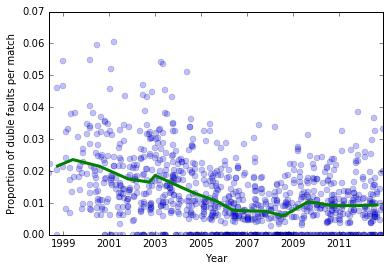

In [32]:
plt.plot_date(date, df["dblfaults"], alpha=.25, lw=0)
plt.plot_date(gb["start date"].max(), gb["dblfaults"].mean(), "-", lw=3)
plt.xlabel("Year")
plt.ylabel("Proportion of duble faults per match")

# 7.2 Z検定
コインの例

In [48]:
import scipy.stats as st
import scipy.special as sp

In [49]:
n = 100 # 試行回数
h = 61  # 表が出た回数
q = .5 # 帰無仮説（コインに歪みながない）

In [50]:
xbar = float(h)/n 
z = (xbar - q ) * np.sqrt(n/(q*(1-q))) # 中心0の標準偏差1になるようにマッピング
z

2.1999999999999997

In [51]:
pval = 2 * ( 1- st.norm.cdf(z))
pval

0.02780689502699718

# 7.3 初めてのベイズ法

In [52]:
posterior = lambda n, h, q: ((n+1) * st.binom(n, q).pmf(h))

(0, 9.2387432590899063)

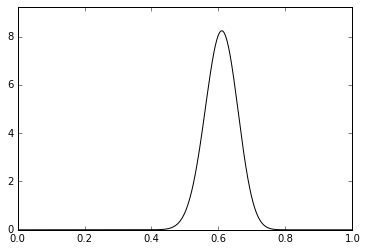

In [54]:
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)
plt.plot(q, d, "-k")
plt.ylim(0, d.max()+1)

# 7.4 分割表とカイ二乗検定を用いた、2変数間の相関推定

In [58]:
file_name = "data/tennis/{name}.csv".format(name=player.replace(" ", "-"))
df = pd.read_csv(file_name)
print(str(len(df.columns)))
df[df.columns[:4]].tail()

70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


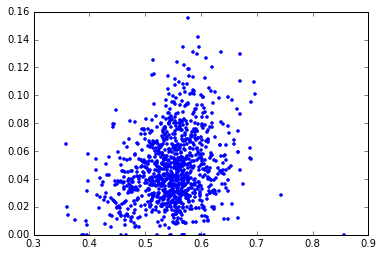

In [61]:
npoints = df["player1 total points total"]
points = df["player1 total points won"]/npoints
aces = df["player1 aces"] /npoints
plt.plot(points, aces, ".")

In [68]:
df_bis = pd.DataFrame({"points":points, "aces":aces}).dropna()
df_bis.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


In [69]:
df_bis.corr()

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


In [70]:
df_bis["result"] = df_bis["points"] > df_bis["points"].median()
df_bis["manyaces"] = df_bis["aces"] > df_bis["aces"].median()
df_bis.tail()

,aces,points,result,manyaces
1173,0.024390,0.585366,True,False
1174,0.039855,0.471014,False,False
1175,0.046512,0.639535,True,True
1176,0.020202,0.606061,True,False
1177,0.069364,0.531792,False,True


In [79]:
pd.crosstab(df_bis["result"], df_bis["manyaces"])

manyaces,False,True
result,,
False,300,214
True,214,299


In [81]:
st.chi2_contingency(pd.crosstab(df_bis["result"], df_bis["manyaces"]))

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))